In [6]:
#//Pandas를 사용하여 CSV파일을 읽고 data 라는 DataFrame객체에 그것들을 저장한다. 

import pandas as pd

data = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data',header=None)
data.columns = ['sepal length', 'sepal width', 'petal length', 'petal width', 'class']
data.head() 



,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
from pandas.api.types import is_numeric_dtype

for col in data.columns:   #각 컬럼에 대해서
    if is_numeric_dtype(data[col]):
        print('%s:' % (col))   #컬럼 이름
        print('\t Mean = %.2f' % data[col].mean())   #평균
        print('\t Standard deviation = %.2f' % data[col].std())   #표준편차
        print('\t Minimum = %.2f' % data[col].min())   #최소값
        print('\t Maximum = %.2f' % data[col].max() )  #최대값

sepal length:
	 Mean = 5.84
	 Standard deviation = 0.83
	 Minimum = 4.30
	 Maximum = 7.90
sepal width:
	 Mean = 3.05
	 Standard deviation = 0.43
	 Minimum = 2.00
	 Maximum = 4.40
petal length:
	 Mean = 3.76
	 Standard deviation = 1.76
	 Minimum = 1.00
	 Maximum = 6.90
petal width:
	 Mean = 1.20
	 Standard deviation = 0.76
	 Minimum = 0.10
	 Maximum = 2.50


In [8]:
#3. For the qualitative attribute (class), count the frequency for each of its distinct values.

data['class'].value_counts()

Iris-versicolor    50
Iris-virginica     50
Iris-setosa        50
Name: class, dtype: int64

In [9]:
data.describe(include = 'all')

#describe() 함수를 사용하여 모든 속성에 대해 summary 한다. 
#속성값이 quantitive => 평균, 표준편차, 최소/중간/최대 값
#속성 값이 qualitative=> unique vaule의 수, top values(최빈값)

#Note that count refers to the number of non-missing values for each attribute.

,sepal length,sepal width,petal length,petal width,class
count,150.000000,150.000000,150.000000,150.000000,150
unique,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,Iris-versicolor
freq,NaN,NaN,NaN,NaN,50
mean,5.843333,3.054000,3.758667,1.198667,NaN
std,0.828066,0.433594,1.764420,0.763161,NaN
min,4.300000,2.000000,1.000000,0.100000,NaN
25%,5.100000,2.800000,1.600000,0.300000,NaN
50%,5.800000,3.000000,4.350000,1.300000,NaN
75%,6.400000,3.300000,5.100000,1.800000,NaN


In [10]:
#다변량 통계인 경우, 속성값들의 쌍 사이에서 covariance(공분산), correlation(상관관계)를 계산할 수 있다.

print('Covariance: ')
data.cov()

Covariance: 


,sepal length,sepal width,petal length,petal width
sepal length,0.685694,-0.039268,1.273682,0.516904
sepal width,-0.039268,0.188004,-0.321713,-0.117981
petal length,1.273682,-0.321713,3.113179,1.296387
petal width,0.516904,-0.117981,1.296387,0.582414


In [11]:
print('Correlation:')
data.corr()

Correlation:


,sepal length,sepal width,petal length,petal width
sepal length,1.000000,-0.109369,0.871754,0.817954
sepal width,-0.109369,1.000000,-0.420516,-0.356544
petal length,0.871754,-0.420516,1.000000,0.962757
petal width,0.817954,-0.356544,0.962757,1.000000


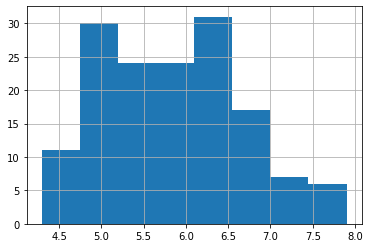

In [12]:
#3.2 Data Visualization
#데이터 시각화는 정보를 그래픽 또는 표 형식으로 표시하는 것
#성공적인 시각화는 데이터의 특성과 데이터 항목이나 속성 간의 관계를 분석하거나 보고할 수 있도록 데이터(정보)를 시각적 형식으로 변환할 것을 요구한다.
#이 튜토리얼에서는 섹션 3.1에 작성된 Iris 데이터를 표시하는 방법을 배우게 된다.

#먼저 sepal length 속성에 대해 8개의 bin으로 분리하여 히스토그램을 그린다. 그리고 각 bin의 frequency 를 센다.

%matplotlib inline

data['sepal length'].hist(bins=8)

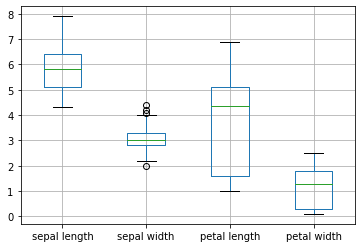

In [14]:
#boxplot() 은 각 속성에 대한 값의 분포를 보여줄 수 있다.

data.boxplot()

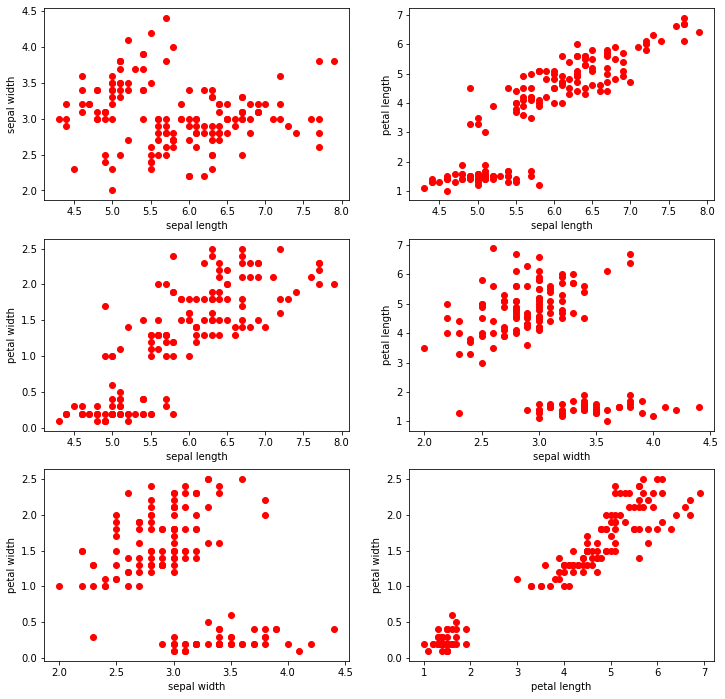

In [23]:
#속성값들의 pair에 대해 그들의 joint distribution 을 시각화 하기 위해 scatter plot 을 쓸 수 있다.


import matplotlib.pyplot as plt

fig, axes = plt.subplots(3, 2, figsize=(12,12))
index = 0
for i in range(3):
    for j in range(i+1,4):
        ax1 = int(index/2)
        ax2 = index % 2
        axes[ax1][ax2].scatter(data[data.columns[i]], data[data.columns[j]], color='red') 
        axes[ax1][ax2].set_xlabel(data.columns[i])
        axes[ax1][ax2].set_ylabel(data.columns[j])
        index = index + 1

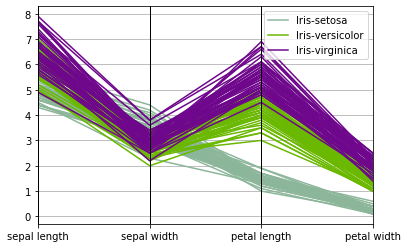

In [24]:
#parallel_coordinates() 는 모든 데이터 point 들을 동시에 나타낼 수 있다.
#Parallel coordinate(평행 좌표)는 각 속성에 대해 하나의 좌표 축을 가지지만 다른 축들은 평행하다. 
#객체가 점이 아닌 선으로 표시된다. 




from pandas.plotting import parallel_coordinates
%matplotlib inline

parallel_coordinates(data, 'class')

#각 클래스에 따라 다른 색으로 분류됨.

In [2]:
#Module 4: Data Preprocessing
# : 데이터 마이닝 분석을 개선하기위해 data cleaning, selecting, transforming 기법


#4.1 Data Quality Issues
#낮은 데이터 품질은 데이터 마이닝에 악영향을 미칠 수 있다. 
#일반적인 데이터 품질 문제에는 노이즈, 특이치, 누락 값 및 중복 데이터가 포함된다. 
#이 절에서는 이러한 데이터 품질 문제를 완화하기 위한 Python 코드의 예를 제시한다. 
#우리는 유방암 환자에 대한 정보를 포함하는 UCI 기계 학습 저장소의 예제 데이터셋으로 시작한다. 
#먼저 pandas lead_csv() 함수를 이용해 데이터셋을 다운받아 처음 5개의 데이터 포인트를 표시한다.


import pandas as pd

data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data', header=None)
data.columns = ['Sample code', 'Clump Thickness', 'Uniformity of Cell Size', 'Uniformity of CellShape','Marginal Adhesion', 'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin','Normal Nucleoli', 'Mitoses','Class']
data = data.drop(['Sample code'],axis=1) 
print('Number of instances = %d' % (data.shape[0])) 
print('Number of attributes = %d' % (data.shape[1])) 
data.head()

URLError: <urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1076)>

In [7]:
#Bare Nuclei 열의 missing value는 그 열의 medial value로 대체된다. 

data2 = data['Bare Nuclei']

print('Before replacing missing values:') 
print(data2[20:25])
data2 = data2.fillna(data2.median())

print('\nAfter replacing missing values:')
print(data2[20:25])

Before replacing missing values:
20     10
21      7
22      1
23    NaN
24      1
Name: Bare Nuclei, dtype: object

After replacing missing values:
20    10
21     7
22     1
23     1
24     1
Name: Bare Nuclei, dtype: object


In [6]:
#4.1.1 Missing Value : 드문일이 아님. not collected or inapplicable to the data instancese.

#원본 데이터에서 누락된 값은 '?'로 인코딩된다. 우리의 첫 번째 과제는 누락된 값을 NaN으로 변환하는 것이다.
#그러면 데이터의 각 열에 있는 결측값의 수를 셀 수 있다.

import numpy as np

data = data.replace('?',np.NaN)
print('Number of instances = %d' % (data.shape[0])) 
print('Number of attributes = %d' % (data.shape[1]))

print('Number of missing values:')
for col in data.columns:
    print('\t%s : %d' % (col,data[col].isna().sum()))

Number of instances = 699
Number of attributes = 10
Number of missing values:
	Clump Thickness : 0
	Uniformity of Cell Size : 0
	Uniformity of CellShape : 0
	Marginal Adhesion : 0
	Single Epithelial Cell Size : 0
	Bare Nuclei : 16
	Bland Chromatin : 0
	Normal Nucleoli : 0
	Mitoses : 0
	Class : 0


In [12]:
#missing 값을 대체하는 것 대신 dropna()로 missing value 를 포함하는 data points를 버린다.

print('Number of rows in original data = %d' % (data.shape[0]))

data2 = data.dropna()
print('Number of rows after discarding missing values = %d' % (data2.shape[0]))

Number of rows in original data = 699
Number of rows after discarding missing values = 683


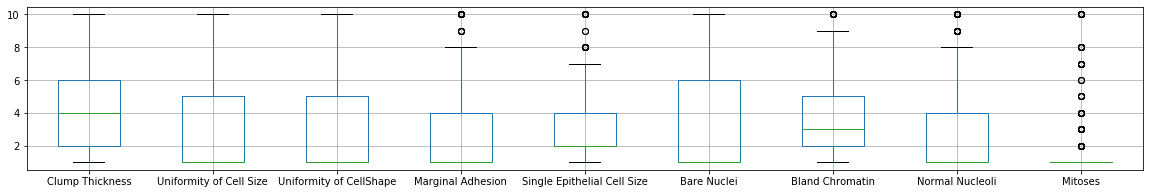

In [13]:
#4.1.2 Outliers : 나머지 데이터 집합과 상당히 다른 특성을 가진 데이터 인스턴스다. 
#아래 예제 코드에서 상자 그림을 그려 Outliers가 들어 있는 표의 열을 식별할 것이다. 
#모든 열의 값('Bare Nuclei' 제외)은 원래 'int64'로 저장되는 반면, 'Bare Nuclei' 열의 값은 문자열 객체로 저장된다
#(처음 열에는 결측값을 나타내는 '?'와 같은 문자열이 포함되기 때문에). 
#따라서 상자 그림을 만들기 전에 먼저 열을 숫자 값으로 변환해야 한다. 그렇지 않으면 상자 그림을 그릴 때 열이 표시되지 않는다.

%matplotlib inline
data2 = data.drop(['Class'],axis=1)
data2['Bare Nuclei'] = pd.to_numeric(data2['Bare Nuclei'])
data2.boxplot(figsize=(20,3))



#Marginal Adhesion, Single Epithetial Cell Size, Bland Cromatin, Normal Nucleoli, and Mitoses => 비정상적으로 높은 값을 포함한다.
#이 Outliers를 삭제하기 위해 각 속성에 대해 Z-score 를 계산하고 비정상적으로 높거나 낮은 Z 점수의 속성을 포함하는 인스턴스(예: Z > 3 또는 Z <= -3인 경우)를 제거할 수 있다.

In [15]:
#다음 코드는 데이터의 열을 표준화(standardizing)한 결과를 보여준다. 결측값(NaN)은 표준화 프로세스의 영향을 받지 않는다는 점에 유의한다.


Z = (data2-data2.mean())/data2.std()
Z[20:25]

,Clump Thickness,Uniformity of Cell Size,Uniformity of CellShape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses
20,0.917080,-0.044070,-0.406284,2.519152,0.805662,1.771569,0.640688,0.371049,1.405526
21,1.982519,0.611354,0.603167,0.067638,1.257272,0.948266,1.460910,2.335921,-0.343666
22,-0.503505,-0.699494,-0.742767,-0.632794,-0.549168,-0.698341,-0.589645,-0.611387,-0.343666
23,1.272227,0.283642,0.603167,-0.632794,-0.549168,NaN,1.460910,0.043570,-0.343666
24,-1.213798,-0.699494,-0.742767,-0.632794,-0.549168,-0.698341,-0.179534,-0.611387,-0.343666


In [17]:
#Z > 3 or Z <= -3 인 열들을 삭제한 결과

print('Number of rows before discarding outliers = %d' % (Z.shape[0]))

Z2 = Z.loc[((Z > -3).sum(axis=1)==9) & ((Z <= 3).sum(axis=1)==9),:]
print('Number of rows after discarding missing values = %d' % (Z2.shape[0]))

Number of rows before discarding outliers = 699
Number of rows after discarding missing values = 632


In [19]:
#4.1.3 Duplicate Data : 
#일부 데이터 집합, 특히 multiple data sources를 merge하여 얻은 데이터 집합은 중복 또는 거의 duplicate 인스턴스를 포함할 수 있다.
#중복제거라(deduplication)는 중복 데이터 문제를 처리하는 프로세스를 가리키는 데 자주 사용된다.




#check for duplicate instances in the breast cancer dataset.

dups = data.duplicated()
print('Number of duplicate rows = %d' % (dups.sum())) 
data.loc[[11,28]]



#duplicate() : 각 행이 그 전 행과 중복되는지에 따라 boolean array를 리턴한다. 
#236개의 중복된 행이 있다.(Ex - index 11의 행과 index 28의 행 값이 같다. 다른 개인을 각각 나타내는 것일 수도 있으나 동일한 개인으로부터
#추출된 표본이라고 가정하고 제거해보자.)


Number of duplicate rows = 236


,Clump Thickness,Uniformity of Cell Size,Uniformity of CellShape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
11,2,1,1,1,2,1,2,1,1,2
28,2,1,1,1,2,1,2,1,1,2


In [21]:
print('Number of rows before discarding duplicates = %d' % (data.shape[0])) 
data2 = data.drop_duplicates()
print('Number of rows after discarding duplicates = %d' % (data2.shape[0]))

Number of rows before discarding duplicates = 699
Number of rows after discarding duplicates = 463


TypeError: not all arguments converted during string formatting

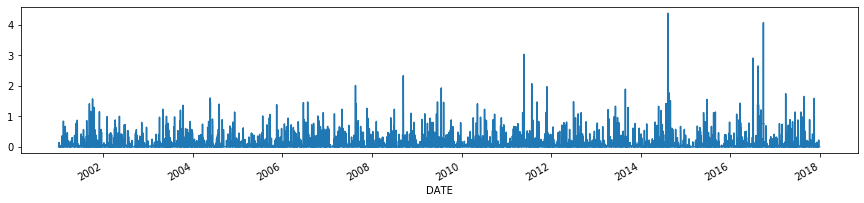

In [4]:
#4.2 Aggregation : 두 개 이상의 객체의 값이 단일 객체로 결합되는 사전 처리 작업이다. 
#목적-> data to be processed 크기 줄이기, 분석의 세분화(granularity of analysis) changing(from fine-scale to coarser-sclae,
#데이터 안정성 향상


#기상 관측소의 일일 강수량 

import pandas as pd

daily = pd.read_csv('4.DTW_prec.csv', header='infer')
daily.index = pd.to_datetime(daily['DATE'])
daily = daily['PRCP']
ax = daily.plot(kind='line',figsize=(15,3))
ax.set_title('Daily Precipitation (variance = )' % (daily.var()))


Text(0.5, 1.0, 'Monthly Precipitation (variance = 2.4241)')

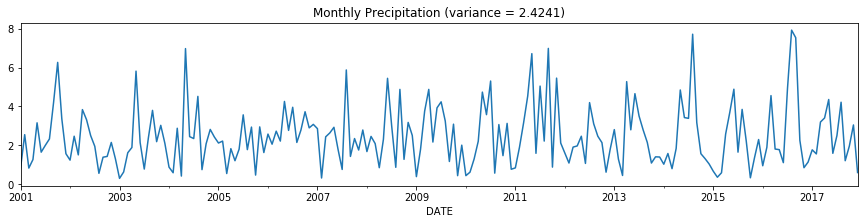

In [5]:
monthly = daily.groupby(pd.Grouper(freq='M')).sum()
ax = monthly.plot(kind='line',figsize=(15,3))
ax.set_title('Monthly Precipitation (variance = %.4f)' % (monthly.var()))

Text(0.5, 1.0, 'Annual Precipitation (variance = 23.6997)')

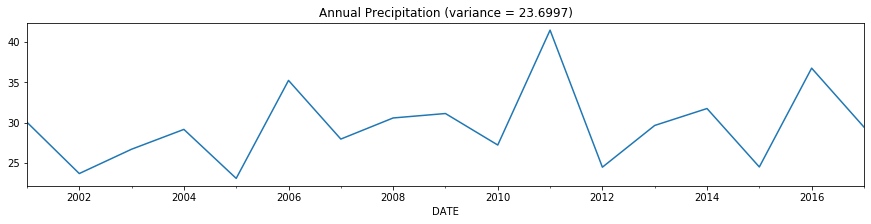

In [6]:
annual = daily.groupby(pd.Grouper(freq='Y')).sum()
ax = annual.plot(kind='line',figsize=(15,3))
ax.set_title('Annual Precipitation (variance = %.4f)' % (annual.var()))

In [26]:
#4.3 Sampling : 탐색적 데이터 분석 / 빅 데이터 애플리케이션에 대한 알고리즘 스케일업 /다양한 데이터 분포로 인한 불확실성 정량화를 위해 사용.
#Data sampling에는 다양한 방법이 있는데, 데이터 세트에서 선택한 각 인스턴스를 제거하지 않고 교체(replacement)로 샘플링하는 방법이 있으며
#선택한 각 인스턴스를 제거하지 않기 때문에 샘플에서 두 번 이상 선택할 수 있다.


data.head()


,Clump Thickness,Uniformity of Cell Size,Uniformity of CellShape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


In [27]:
sample = data.sample(n=3)
sample


#샘플사이즈 3 만큼 랜덤하게 선택됨.

,Clump Thickness,Uniformity of Cell Size,Uniformity of CellShape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
193,1,1,1,1,2,1,3,1,1,2
666,5,2,2,2,2,1,1,1,2,2
270,8,4,7,1,3,10,3,9,2,4


In [28]:
#replacement 없이 1%의 데이터를 랜덤하게 선택한다. random_state 값은 랜덤숫자생성기에 시드값을 정한다.

sample = data.sample(frac=0.01, random_state=1)
sample

,Clump Thickness,Uniformity of Cell Size,Uniformity of CellShape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
584,5,1,1,6,3,1,1,1,1,2
417,1,1,1,1,2,1,2,1,1,2
606,4,1,1,2,2,1,1,1,1,2
349,4,2,3,5,3,8,7,6,1,4
134,3,1,1,1,3,1,2,1,1,2
502,4,1,1,2,2,1,2,1,1,2
117,4,5,5,10,4,10,7,5,8,4


In [29]:
# 전체 데이터의 1%와 동일한 크기의 샘플을 만들기 위해 replacement로 샘플링을 수행한다. 
# 표본에서 duplicate 인스턴스를 관찰할 수 있어야 한다(by increasing the sample size)

sample = data.sample(frac=0.01, replace=True, random_state=1) 
sample

,Clump Thickness,Uniformity of Cell Size,Uniformity of CellShape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
37,6,2,1,1,1,1,7,1,1,2
235,3,1,4,1,2,NaN,3,1,1,2
72,1,3,3,2,2,1,7,2,1,2
645,3,1,1,1,2,1,2,1,1,2
144,2,1,1,1,2,1,2,1,1,2
129,1,1,1,1,10,1,1,1,1,2
583,3,1,1,1,2,1,1,1,1,2


1     145
2      50
3     108
4      80
5     130
6      34
7      23
8      46
9      14
10     69
Name: Clump Thickness, dtype: int64

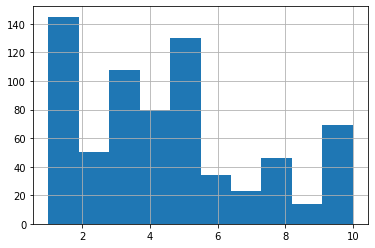

In [30]:
#4.4 Discretization : 실수값 속성응ㄹ categorical 속성으로 바꾸는데에 사용. 
#아래 예는 유방암 데이터 세트의 'Clump Thickness' 속성에 적용되는 간단하지만 널리 사용되는 두 가지 unsupervised descretization 메소드(equal width and equal depth)을 예시하고 있다.
#먼저 속성 값의 분포를 보여주는 히스토그램을 표시한다. value_counts() 함수로 각 속성 값의 빈도 카운트.

data['Clump Thickness'].hist(bins=10)
data['Clump Thickness'].value_counts(sort=False)


In [32]:
#cut() : 유사한 간격 너비의 4개의 빈으로 속성을 discretize.
#value_counts() : 각 빈의 인스턴스 수를 결정.

bins = pd.cut(data['Clump Thickness'],4) 
bins.value_counts(sort=False)

(0.991, 3.25]    303
(3.25, 5.5]      210
(5.5, 7.75]       57
(7.75, 10.0]     129
Name: Clump Thickness, dtype: int64

In [33]:
#Equal Frequency Method
#qcut(): 각 빈의 인스턴스 수가 거의 같도록 값을 4개의 빈으로 분할할 수 있다.


bins = pd.qcut(data['Clump Thickness'],4)
bins.value_counts(sort=False)

(0.999, 2.0]    195
(2.0, 4.0]      188
(4.0, 6.0]      164
(6.0, 10.0]     152
Name: Clump Thickness, dtype: int64

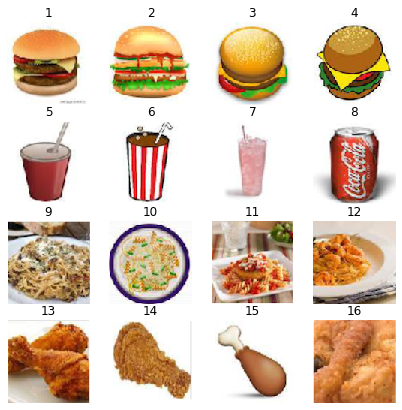

In [56]:
#4.5 Principal Component Analysis : 고차원 공간에서 저차원 공간으로 투영하여 데이터의 속성 수를 줄이는 고전적인 방법.
#PCA에 의해 생성된 새로운 속성(구성요소) : (1) 원래 속성의 선형 조합이며, (2) 서로 직교(수직)이며, (3) 데이터의 최대 변동량을 캡처한다.



#아래의 예는 이미지 데이터 세트에 PCA를 적용하는 것을 예시한다. 
#16개의 RGB 파일이 있으며, 각 파일의 크기는 111 x 111 픽셀이다. 
#아래의 예제 코드는 각 이미지 파일을 읽고 RGB 이미지를 111 x 111 x 3 = 36963 feature 값으로 변환한다. 
#이렇게 하면 16 x 36963 크기의 데이터 매트릭스가 생성된다.


%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

numImages = 16
fig = plt.figure(figsize=(7,7))
imgData = np.zeros(shape = (numImages,49284))

for i in range(1,numImages+1):
    filename = 'pics/Picture'+str(i)+'.jpg'
    img = mpimg.imread(filename)
    ax = fig.add_subplot(4,4,i)
    plt.imshow(img)
    plt.axis('off')
    ax.set_title(str(i))
    imgData[i-1] = np.array(img.flatten()).reshape(1,img.shape[0]*img.shape[1]*img.shape[2])

In [57]:
#PCA를 사용하면 데이터 매트릭스는 처음 두 개의 주요 구성요소에 투영된다. 
#원래 이미지 데이터의 투사된 값은 투사된 pandas DataFrame 객체에 저장된다.

import pandas as pd
from sklearn.decomposition import PCA

numComponents = 2
pca = PCA(n_components=numComponents)
pca.fit(imgData)

projected = pca.transform(imgData)
projected = pd.DataFrame(projected,columns=['pc1','pc2'], index=range(1,numImages+1))
projected['food'] = ['burger', 'burger','burger','burger','drink','drink','drink','drink','pasta', 'pasta', 'pasta', 'pasta', 'chicken', 'chicken', 'chicken', 'chicken']

projected


,pc1,pc2,food
1,-1949.291152,6752.202882,burger
2,-143.666932,5983.230847,burger
3,479.368600,6859.335224,burger
4,400.783667,9003.230249,burger
5,-7701.170250,216.923411,drink
6,-8855.219400,-4417.700269,drink
7,-10825.427142,-5676.052056,drink
8,-3259.527720,1470.334802,drink
9,7603.534252,-5345.207713,pasta
10,1107.973109,-5087.976550,pasta


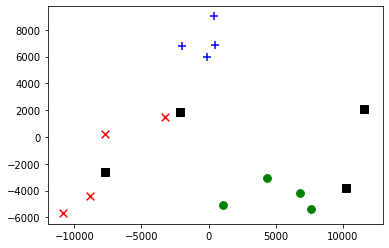

In [58]:
import matplotlib.pyplot as plt

colors = {'burger':'b', 'drink':'r', 'pasta':'g', 'chicken':'k'} 
markerTypes = {'burger':'+', 'drink':'x', 'pasta':'o', 'chicken':'s'}
for foodType in markerTypes:
    d = projected[projected['food']==foodType] 
    plt.scatter(d['pc1'],d['pc2'],c=colors[foodType],s=60,marker=markerTypes[foodType])